In [92]:
import pandas as pd
import pandas_bokeh
import numpy as np
import seaborn as sns
import re
import matplotlib.pyplot as plt

In [38]:
pd.set_option("max_columns", 999)
pandas_bokeh.output_notebook()

Loading BokehJS ...

In [39]:
df = pd.read_csv('../../Data/pokedex.csv').drop('Unnamed: 0', axis=1)
df.head()

,pokedex_number,name,german_name,japanese_name,generation,status,species,type_number,type_1,type_2,height_m,weight_kg,abilities_number,ability_1,ability_2,ability_hidden,total_points,hp,attack,defense,sp_attack,sp_defense,speed,catch_rate,base_friendship,base_experience,growth_rate,egg_type_number,egg_type_1,egg_type_2,percentage_male,egg_cycles,against_normal,against_fire,against_water,against_electric,against_grass,against_ice,against_fight,against_poison,against_ground,against_flying,against_psychic,against_bug,against_rock,against_ghost,against_dragon,against_dark,against_steel,against_fairy
0,1,Bulbasaur,Bisasam,フシギダネ (Fushigidane),1,Normal,Seed Pokémon,2,Grass,Poison,0.7,6.9,2,Overgrow,NaN,Chlorophyll,318.0,45.0,49.0,49.0,65.0,65.0,45.0,45.0,70.0,64.0,Medium Slow,2,Grass,Monster,87.5,20.0,1.0,2.0,0.5,0.5,0.25,2.0,0.5,1.0,1.0,2.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,0.5
1,2,Ivysaur,Bisaknosp,フシギソウ (Fushigisou),1,Normal,Seed Pokémon,2,Grass,Poison,1.0,13.0,2,Overgrow,NaN,Chlorophyll,405.0,60.0,62.0,63.0,80.0,80.0,60.0,45.0,70.0,142.0,Medium Slow,2,Grass,Monster,87.5,20.0,1.0,2.0,0.5,0.5,0.25,2.0,0.5,1.0,1.0,2.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,0.5
2,3,Venusaur,Bisaflor,フシギバナ (Fushigibana),1,Normal,Seed Pokémon,2,Grass,Poison,2.0,100.0,2,Overgrow,NaN,Chlorophyll,525.0,80.0,82.0,83.0,100.0,100.0,80.0,45.0,70.0,236.0,Medium Slow,2,Grass,Monster,87.5,20.0,1.0,2.0,0.5,0.5,0.25,2.0,0.5,1.0,1.0,2.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,0.5
3,3,Mega Venusaur,Bisaflor,フシギバナ (Fushigibana),1,Normal,Seed Pokémon,2,Grass,Poison,2.4,155.5,1,Thick Fat,NaN,NaN,625.0,80.0,100.0,123.0,122.0,120.0,80.0,45.0,70.0,281.0,Medium Slow,2,Grass,Monster,87.5,20.0,1.0,1.0,0.5,0.5,0.25,1.0,0.5,1.0,1.0,2.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,0.5
4,4,Charmander,Glumanda,ヒトカゲ (Hitokage),1,Normal,Lizard Pokémon,1,Fire,NaN,0.6,8.5,2,Blaze,NaN,Solar Power,309.0,39.0,52.0,43.0,60.0,50.0,65.0,45.0,70.0,62.0,Medium Slow,2,Dragon,Monster,87.5,20.0,1.0,0.5,2.0,1.0,0.50,0.5,1.0,1.0,2.0,1.0,1.0,0.5,2.0,1.0,1.0,1.0,0.5,0.5


In [40]:
df_qual = df.select_dtypes(include='object').drop(['german_name', 'japanese_name'], axis=1)
df_qual.head()

,name,status,species,type_1,type_2,ability_1,ability_2,ability_hidden,growth_rate,egg_type_1,egg_type_2
0,Bulbasaur,Normal,Seed Pokémon,Grass,Poison,Overgrow,NaN,Chlorophyll,Medium Slow,Grass,Monster
1,Ivysaur,Normal,Seed Pokémon,Grass,Poison,Overgrow,NaN,Chlorophyll,Medium Slow,Grass,Monster
2,Venusaur,Normal,Seed Pokémon,Grass,Poison,Overgrow,NaN,Chlorophyll,Medium Slow,Grass,Monster
3,Mega Venusaur,Normal,Seed Pokémon,Grass,Poison,Thick Fat,NaN,NaN,Medium Slow,Grass,Monster
4,Charmander,Normal,Lizard Pokémon,Fire,NaN,Blaze,NaN,Solar Power,Medium Slow,Dragon,Monster


In [89]:
df_qual.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1028 entries, 0 to 1027
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   name            1028 non-null   object
 1   status          1028 non-null   object
 2   species         1028 non-null   object
 3   type_1          1028 non-null   object
 4   type_2          542 non-null    object
 5   ability_1       1025 non-null   object
 6   ability_2       513 non-null    object
 7   ability_hidden  810 non-null    object
 8   growth_rate     1027 non-null   object
 9   egg_type_1      1025 non-null   object
 10  egg_type_2      282 non-null    object
dtypes: object(11)
memory usage: 88.5+ KB


# Distributions

## Status

There are 4 pokemon statuses:  
* Normal,  
* Sub Legendary,  
* Legendary,  
* Mythical.  

  
As we can see, the majority of Pokemon is normal. Only around 3% of all Pokemons are mythical.

[Text(0, 0.5, 'Number of Pokemons'),
 Text(0.5, 0, 'Pokemon status'),
 Text(0.5, 1.0, 'Pokemon status count')]

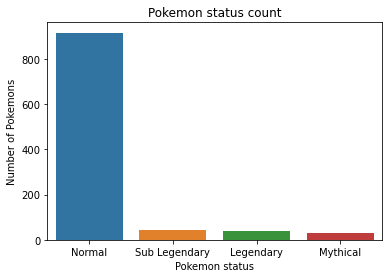

In [41]:
ax = sns.countplot(x='status', data=df_qual)
#.set_title('Pokemon status count')
ax.set(xlabel='Pokemon status', ylabel='Number of Pokemons', title='Pokemon status count')

In [42]:
#status count
df_qual['status'].value_counts().sort_values(ascending=False)

Normal           915
Sub Legendary     45
Legendary         39
Mythical          29
Name: status, dtype: int64

In [43]:
# status percentage
df_qual['status'].value_counts().sort_values(ascending=False)/len(df_qual)*100

Normal           89.007782
Sub Legendary     4.377432
Legendary         3.793774
Mythical          2.821012
Name: status, dtype: float64

## Species

There is 641 Pokemon species. 
Largest species is Mouse and it includes 12 Pokemons.

In [44]:
df_qual.loc[df_qual['species']=='Mouse Pokémon', 'name']

24             Rattata
25      Alolan Rattata
26            Raticate
27     Alolan Raticate
32             Pikachu
33     Partner Pikachu
34              Raichu
35       Alolan Raichu
36           Sandshrew
37    Alolan Sandshrew
38           Sandslash
39    Alolan Sandslash
Name: name, dtype: object

In dataset we can see 412 species (so around 2/3 of all species) that includes only 1 Pokemon. 
Many species names contain more than one word. So for example we can have 'Mouse Pokemon' and 'Aqua Mouse Pokemon' and they do not have anything in common. 


In [45]:
df_qual['species'].value_counts().sort_values(ascending=False)[df_qual['species'].value_counts().sort_values(ascending=False) == 1]

Bud Pokémon           1
Stone Home Pokémon    1
Blast Pokémon         1
Discipline Pokémon    1
Ore Pokémon           1
                     ..
Aqua Mouse Pokémon    1
Handstand Pokémon     1
Savage Pokémon        1
Seafaring Pokémon     1
Chick Pokémon         1
Name: species, Length: 412, dtype: int64

In [46]:
df_qual['species'].value_counts().sort_values(ascending=False)[df_qual['species'].value_counts().sort_values(ascending=False) > 1]

Mouse Pokémon           12
Fox Pokémon              9
Dragon Pokémon           9
Pumpkin Pokémon          8
Flame Pokémon            7
                        ..
Water Fish Pokémon       2
Meteor Pokémon           2
Toxic Lizard Pokémon     2
Poison Bee Pokémon       2
Bolt Strike Pokémon      2
Name: species, Length: 229, dtype: int64

In [47]:
df_qual['species'] = df_qual['species'].transform(lambda x: re.sub(' Pokémon$', '', x))

In [52]:
def extract_direct_species(x):
    if len(x) > 1:
        return x[-1]
    else:
        return x[0]

I extracted only nouns from species variable. Now the grouping is a bit better.

In [61]:
df_qual['species'] = df_qual['species'].transform(lambda x: str.split(x, ' ')).transform(lambda x: extract_direct_species(x))
df_qual['species'].value_counts()

Mouse       16
Bird        16
Fox         11
Snake       10
Fish         9
            ..
Moone        1
Freezing     1
Silent       1
Feeling      1
White        1
Name: species, Length: 552, dtype: int64

In [67]:
df.loc[df['species'].str.contains('White|Feeling|Silent'), ['name', 'species']]

,name,species
332,Ralts,Feeling Pokémon
679,Swanna,White Bird Pokémon
744,Reshiram,Vast White Pokémon
989,Hatterene,Silent Pokémon


After extracting nouns, we have 552 different species.  
There is 325 species with only one Pokemon and 125 with two Pokemons.  
In clustering algorithm we can transform these species to artificially created category (like "other species").

In [71]:
df_qual['species'].value_counts()[df_qual['species'].value_counts() == 1]

Stomach     1
Hippo       1
Symbol      1
Colossal    1
Teamwork    1
           ..
Moone       1
Freezing    1
Silent      1
Feeling     1
White       1
Name: species, Length: 325, dtype: int64

In [74]:
df_qual['species'].value_counts()[df_qual['species'].value_counts() == 2]

Automaton    2
Shield       2
Keeper       2
Rushing      2
Butterfly    2
            ..
Chimp        2
Disaster     2
Gratitude    2
Blaze        2
Doll         2
Name: species, Length: 125, dtype: int64

Text(0.5, 1.0, 'Most common species')

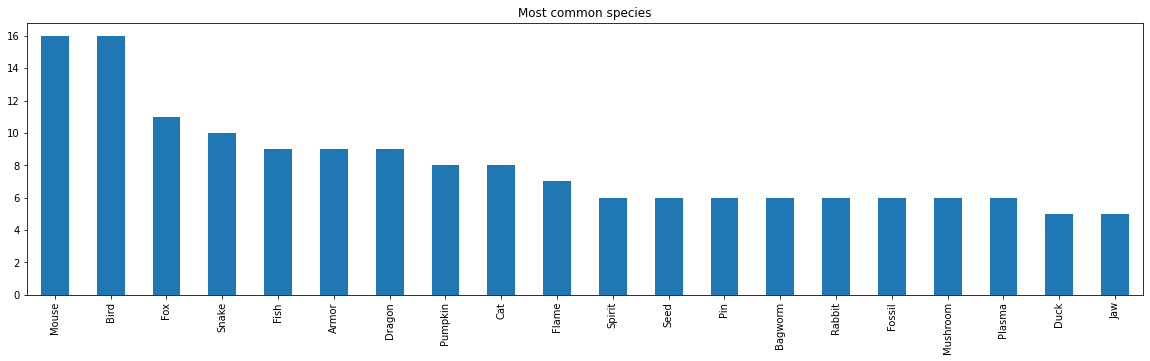

In [96]:
plt.figure(figsize=(20, 5))
df_qual['species'].value_counts().head(20).plot.bar()
plt.title('Most common species')

## Type_1

There is 18 different types of Pokemon. The most common is water type (135 Pokemons) and the least common is flying type (only 8 creatures).

Text(0.5, 1.0, 'Pokemon first type count')

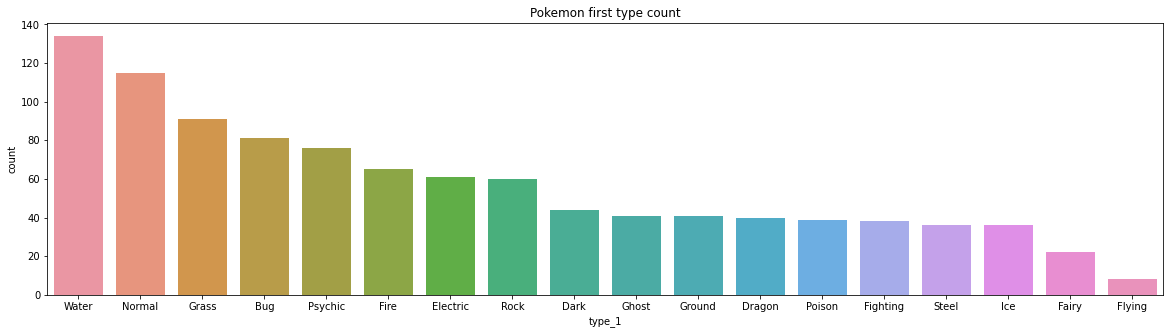

In [108]:
plt.figure(figsize=(20,5))
sns.countplot(x='type_1', data=df_qual, order=df_qual['type_1'].value_counts().index).set_title('Pokemon first type count')


In [109]:
df_qual['type_1'].value_counts()

Water       134
Normal      115
Grass        91
Bug          81
Psychic      76
Fire         65
Electric     61
Rock         60
Dark         44
Ghost        41
Ground       41
Dragon       40
Poison       39
Fighting     38
Steel        36
Ice          36
Fairy        22
Flying        8
Name: type_1, dtype: int64

## Type_2

482 Pokemons do not have second type (it is around 50% of all creatures).  
The most common 2nd type is flying (which is the opposite of first type where flying was the least common).  
The least common 2nd type is bug with only 9 Pokemons.

In [107]:
len(df_qual[df_qual['type_2'].isna()])

486

Text(0.5, 1.0, 'Pokemon second type count')

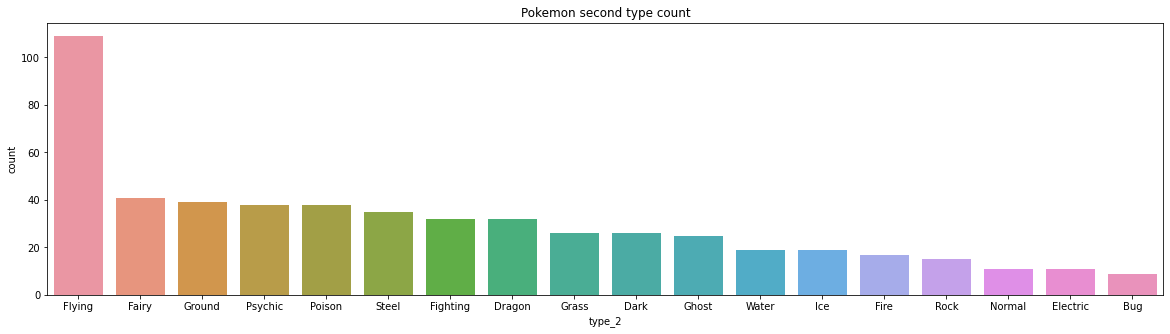

In [110]:
plt.figure(figsize=(20,5))
sns.countplot(x='type_2', data=df_qual, order=df_qual['type_2'].value_counts().index).set_title('Pokemon second type count')

In [104]:
df_qual['type_2'].value_counts()

Flying      109
Fairy        41
Ground       39
Psychic      38
Poison       38
Steel        35
Fighting     32
Dragon       32
Grass        26
Dark         26
Ghost        25
Water        19
Ice          19
Fire         17
Rock         15
Normal       11
Electric     11
Bug           9
Name: type_2, dtype: int64